ModuleNotFoundError: No module named 'surprise'

In [2]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.8 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-macosx_10_15_x86_64.whl size=519371 sha256=74482243f530694da8fd156fafd50289c59fcbe2397b7b3aab15c35acd3df581
  Stored in directory: /Users/victorjoseph/Library/Caches/pip/wheels/75/fa/bc/739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b
Successfully built scikit-surprise
Note: you may need to restart the kernel to use updated packages.


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
       Algorithm  RMSE Mean  RMSE Std  MAE Mean   MAE Std  Fit Time Mean  \
0            SVD   0.936621  0.007199  0.738091  0.006104       0.743771   
1            NMF   0.963241  0.007117  0.757923  0.005815       1.410286   
2  Co Clustering   0.967707  0.008360  0.757615  0.005793       1.252161   
3       SlopeOne   0.944792  0.007117  0.742524  0.004487       0.566474   
4      KNN_Basic   0.978599  0.002274  0.773216  0.001964       0.264673   

   Test Time Mean  
0        0.115549  
1        0.115873  
2        0.090510  
3        1.904395  
4        2.149462  


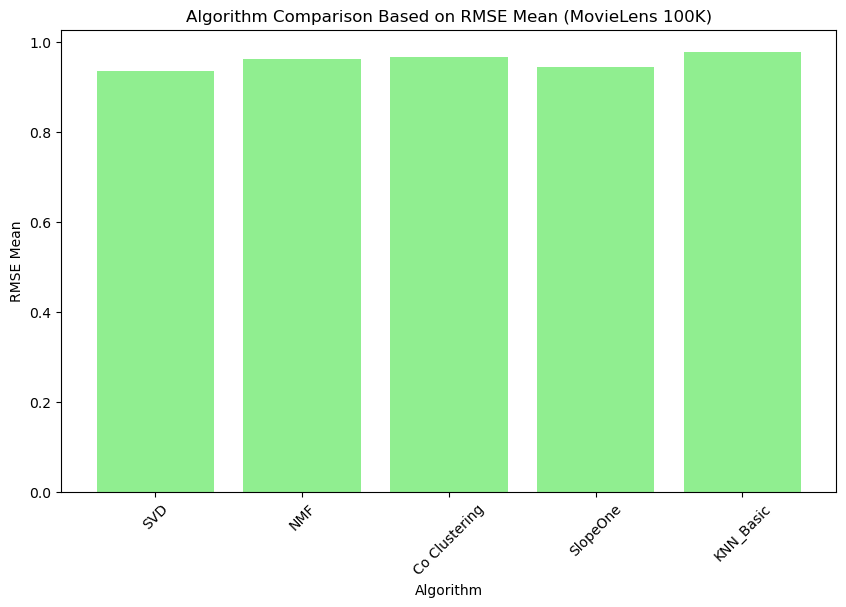

In [4]:
# Import necessary libraries for visualization and calculations
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from surprise import Dataset, KNNBasic, SVD, NMF, SlopeOne, CoClustering
from surprise.model_selection import cross_validate

# Load the MovieLens 100K dataset
data = Dataset.load_builtin('ml-100k')

# List of algorithms to evaluate
algorithms = [SVD(), NMF(), CoClustering(), SlopeOne(), KNNBasic()]
algo_names = ['SVD', 'NMF', 'Co Clustering', 'SlopeOne', 'KNN_Basic']

# Prepare an empty list to store the results
results_list = []

# Cross-validate each algorithm and store detailed results (RMSE, MAE, Fit and Test time)
for algo, name in zip(algorithms, algo_names):
    results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    
    # Append the mean and standard deviation of metrics, along with time metrics
    results_list.append({
        'Algorithm': name,
        'RMSE Mean': np.mean(results['test_rmse']),
        'RMSE Std': np.std(results['test_rmse']),
        'MAE Mean': np.mean(results['test_mae']),
        'MAE Std': np.std(results['test_mae']),
        'Fit Time Mean': np.mean(results['fit_time']),
        'Test Time Mean': np.mean(results['test_time'])
    })

# Convert the list of results into a DataFrame for easier visualization and access
results_df = pd.DataFrame(results_list)

# Display the results DataFrame
print(results_df)

# Plot the RMSE Mean for comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Algorithm'], results_df['RMSE Mean'], color='lightgreen')
plt.title('Algorithm Comparison Based on RMSE Mean (MovieLens 100K)')
plt.xlabel('Algorithm')
plt.ylabel('RMSE Mean')
plt.xticks(rotation=45)
plt.show()